<a href="https://colab.research.google.com/github/soham534/Logistic-Regression/blob/main/TitanicSurvialDataset(LogisticRegression)BySohamBundela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps

1.Import the libraries

2.Import the dataset

3.Perform the Data  Analysis

4.Feature Scaling [Optional]

5.Encoading

6.Feature Selection

7.Choosing the Model-Logistic Regression

8.Split the data-CV

9.Training the Model

10.Test the Model

11.Performance-Confussion Matrix

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

#Import the DataSet

Link: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

#Data Analysis

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

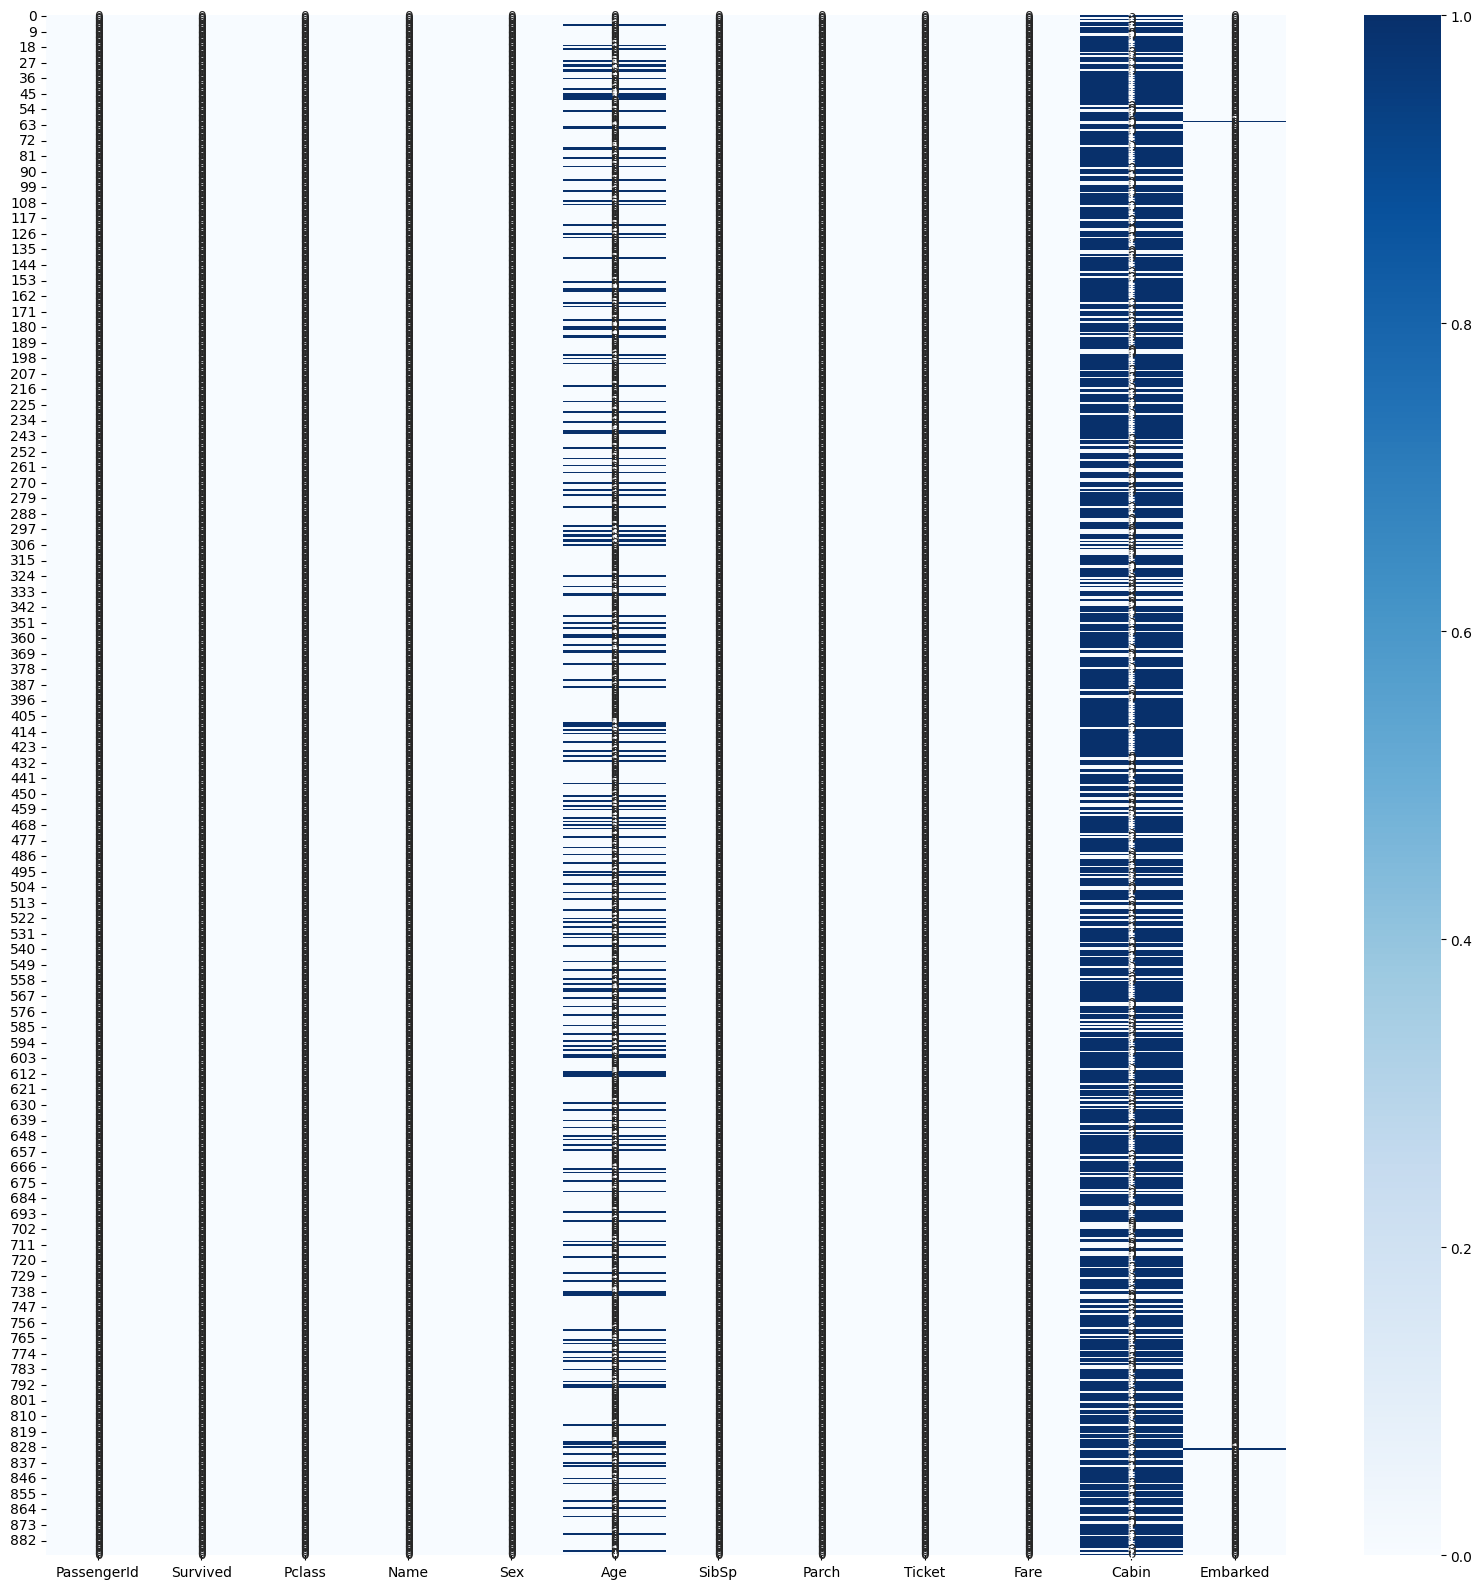

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),annot=True,cmap="Blues")

In [ ]:
#Age Percentage of null values
(df.Age.isnull().sum()/len(df.Age))*100

np.float64(19.865319865319865)

In [ ]:
#Cabin Percentage of null values
(df.Cabin.isnull().sum()/len(df.Cabin))*100

np.float64(77.10437710437711)

In [ ]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
# Drop the Cabin feature
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Hypothesis Testing for Embarked Null replacement

In [ ]:
df.Embarked.unique()
#S - Southampton
#Q - Queenstown
#C - Cherbourgh

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
#Show the datapoint where the Embarked is null
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [ ]:
# Show all the Embarked values wher Pclass = 1
df.loc[df.Pclass==1,"Embarked"].value_counts()

,count
Embarked,
S,127
C,85
Q,2


In [ ]:
# Show all the Embarked values wher Pclass = 2
df.loc[df.Pclass==2,"Embarked"].value_counts()

,count
Embarked,
S,164
C,17
Q,3


In [ ]:
# Show all the Embarked values wher Pclass = 3
df.loc[df.Pclass==3,"Embarked"].value_counts()

,count
Embarked,
S,353
Q,72
C,66


In [ ]:
df.Fare.value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
13.8583,1
50.4958,1
5.0000,1


In [ ]:
# Show all the Embarked values wher Fare = 80.0
df.loc[df.Fare==80.0,"Embarked"]

,Embarked
61,NaN
829,NaN


In [ ]:
df.Ticket.value_counts()

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1


In [ ]:
# Show all the Embarked values wher Ticket = 113572
df.loc[df.Ticket==113572,"Embarked"].value_counts()

,count
Embarked,


Age fixing

In [ ]:
df.Age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
# Mean of the Age Coloumn
df.Age.mean()

np.float64(29.69911764705882)

In [ ]:
# Median of the Age Coloumn
df.Age.median()

28.0

In [ ]:
# Mode of the Age Coloumn
df.Age.mode()

,Age
0,24.0


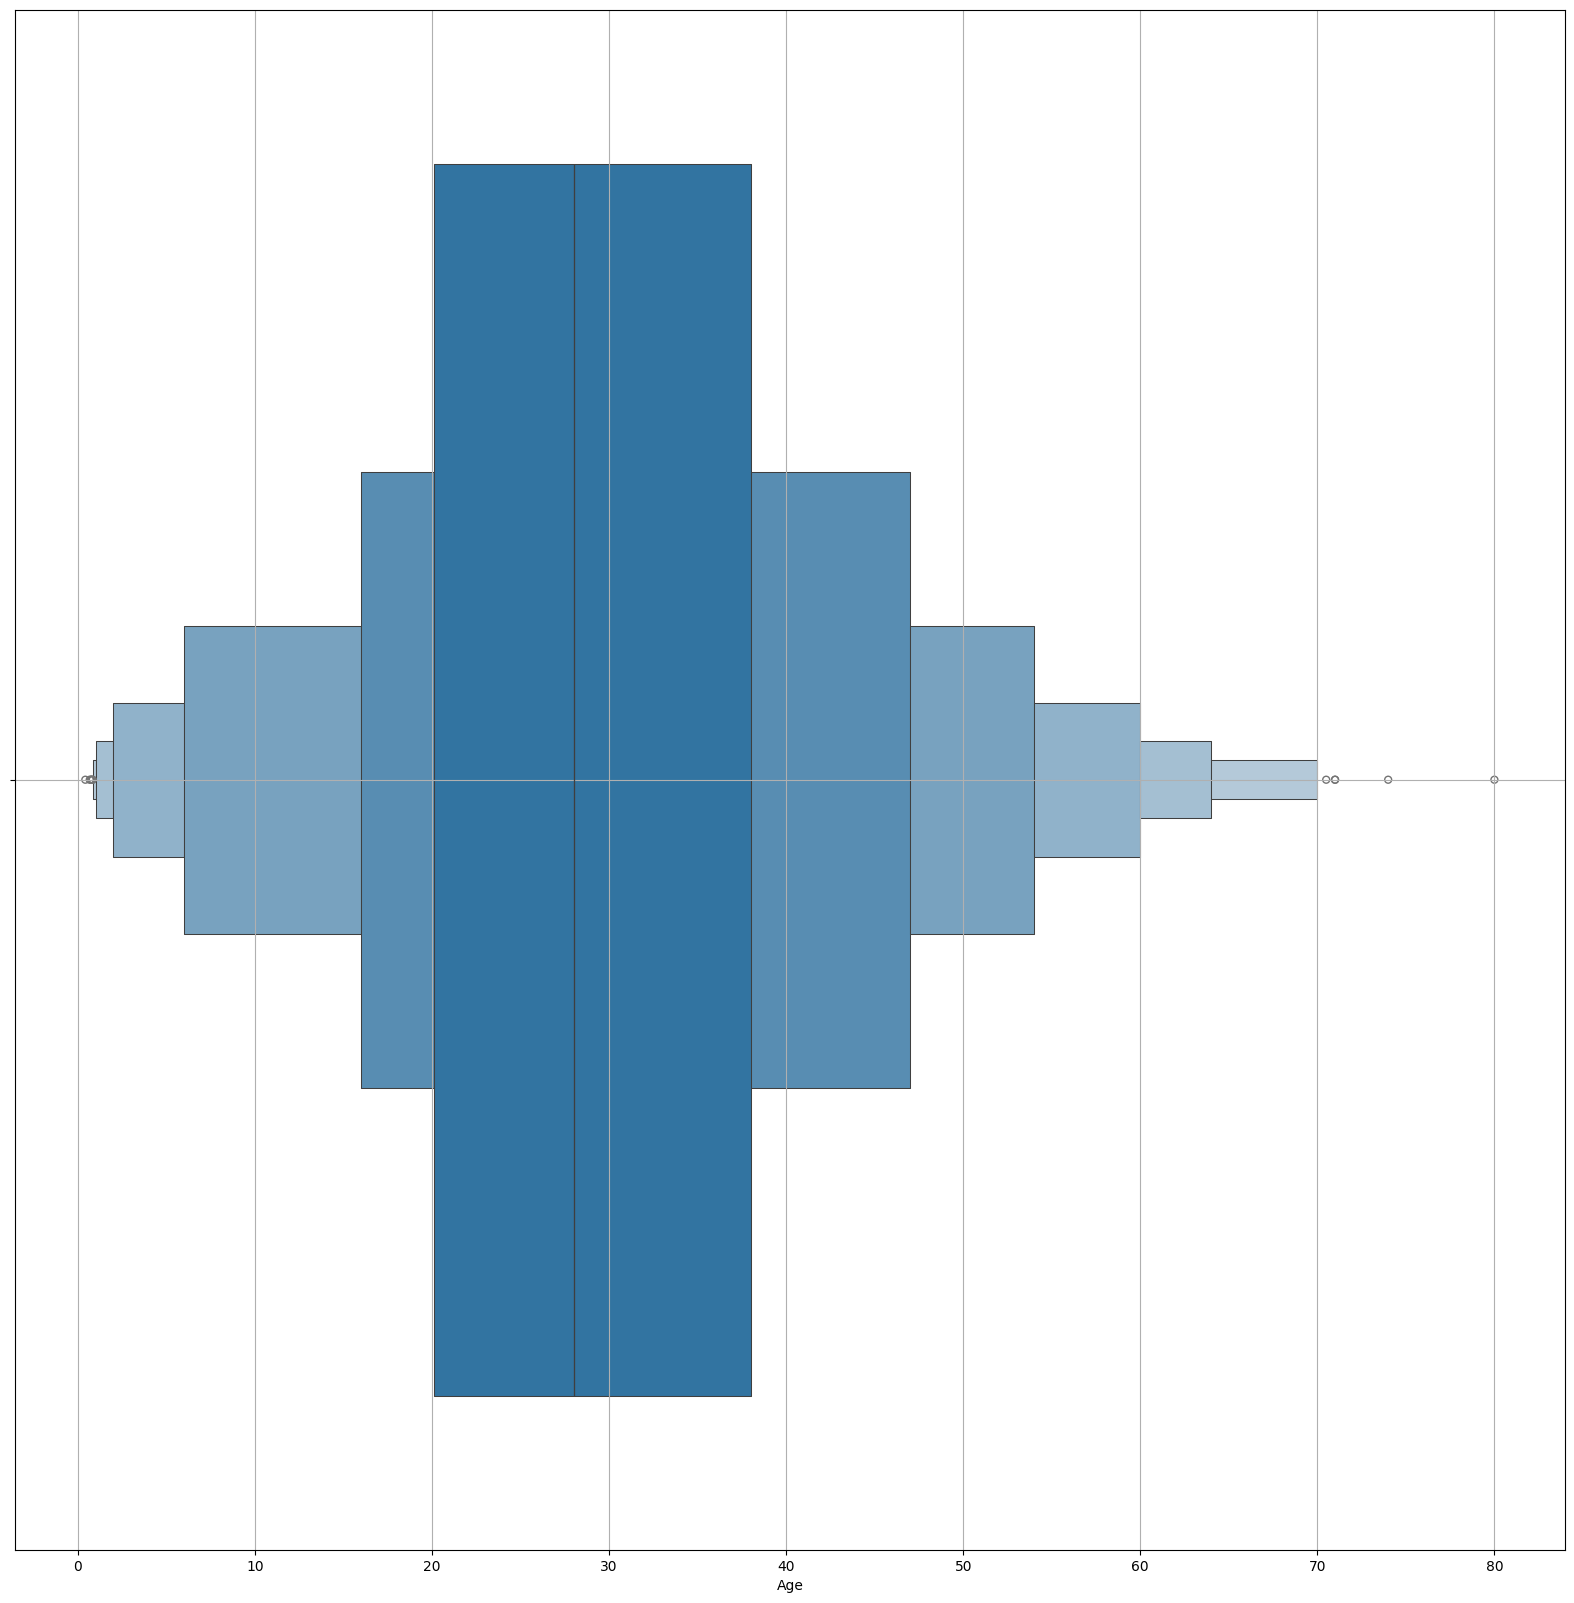

In [ ]:
# Plot a boxplot to find out the outlier i nthe Age columns
plt.figure(figsize=(20,20))
sns.boxenplot(df.Age,orient="h")
plt.grid()

In [ ]:
df.Age.value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [ ]:
df.shape #891-30=861(too high)

(891, 11)

In [ ]:
# Fill all the null values in Age with its Median Value
df.Age.fillna(df.Age.median(),inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Droping the two null rows with Embarked is Null
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Drop off the columns - PassangerId,Name,Ticket
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


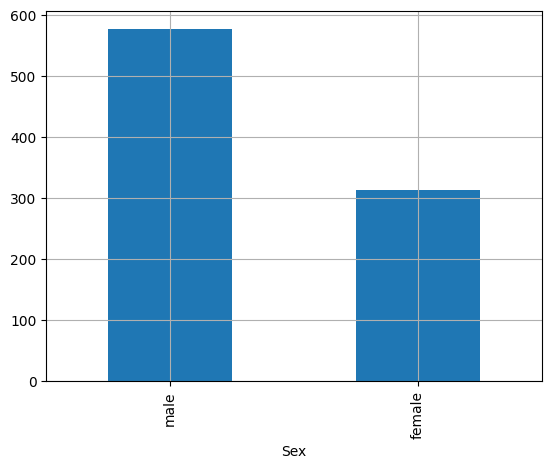

In [ ]:
# Plot a graph of strength of Male vs strength of Female
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

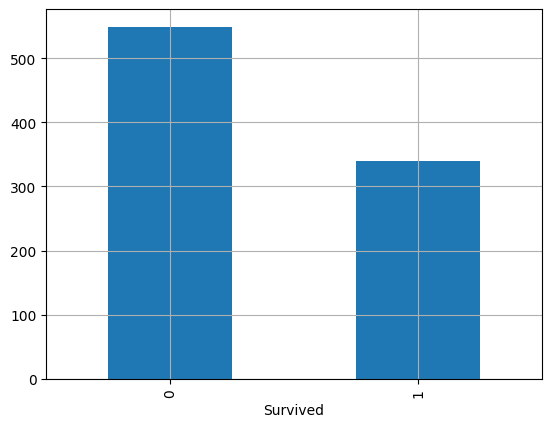

In [ ]:
# Plot a graph of strength of survival vs strength of non-survival
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

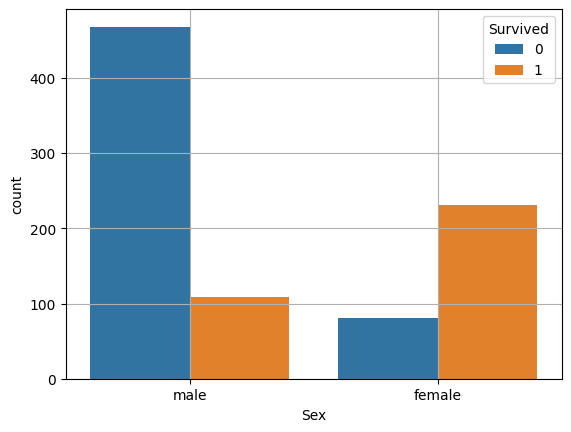

In [ ]:
# Plot a graph to find out the survival and non-survival rate w.r.t Sex
sns.countplot(x="Sex",hue="Survived",data=df)
plt.grid()

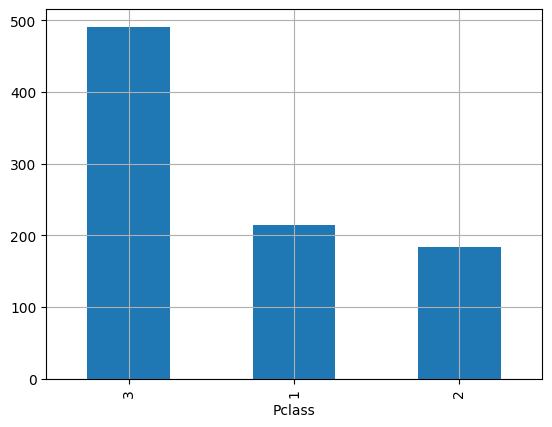

In [ ]:
# Plot a graph to find out the strength of the Pclass
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

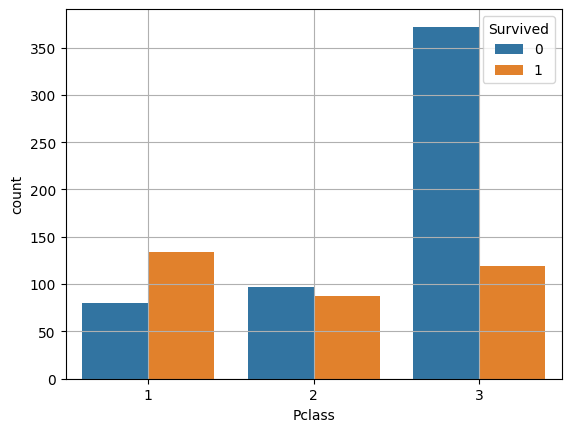

In [ ]:
# Plot a graph to find out the survival and non-survival rate w.r.t Pclass
sns.countplot(x="Pclass",hue="Survived",data=df)
plt.grid()

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Change the data type of Age from float to int
df.Age = df.Age.astype(int)

In [ ]:
# Round off the Fare column to two decimal places
df.Fare = round(df.Fare,2)

# Encoaders - To convert the data from categorical form to numerical form without changing its meaning

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
df.Sex = enc.fit_transform(df.Sex)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 62.5+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc2 = OneHotEncoder()

In [ ]:
newdf = df.copy()

In [ ]:
newdf = pd.get_dummies(newdf["Embarked"],dtype="int")

In [ ]:
newdf

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
df = pd.concat([df,newdf],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [ ]:
# Drop Embarked and C column
df.drop(["Embarked","C"],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    int64  
 8   S         889 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 69.5 KB


<Axes: >

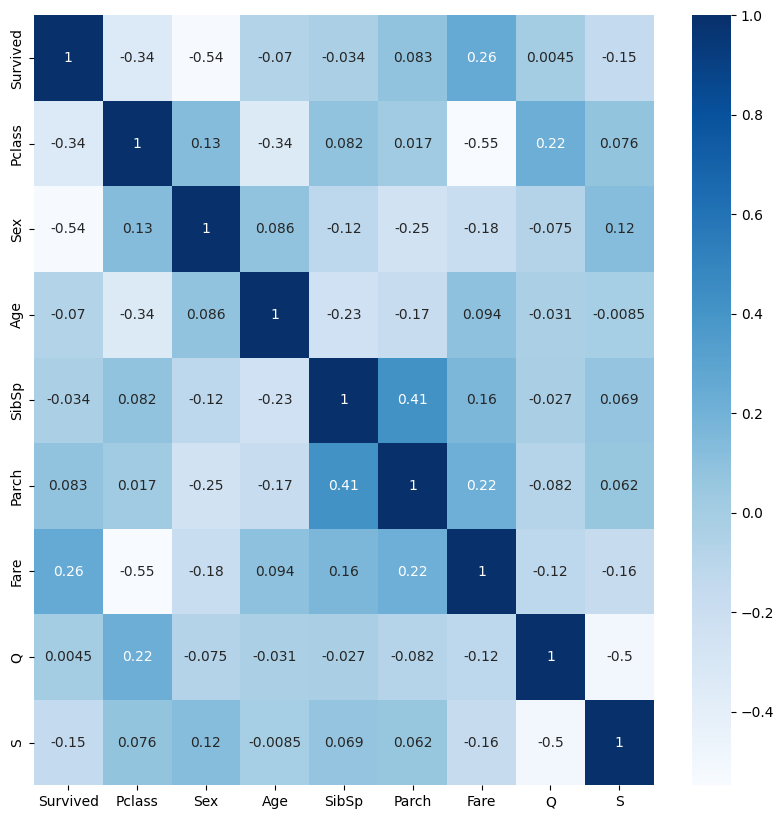

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

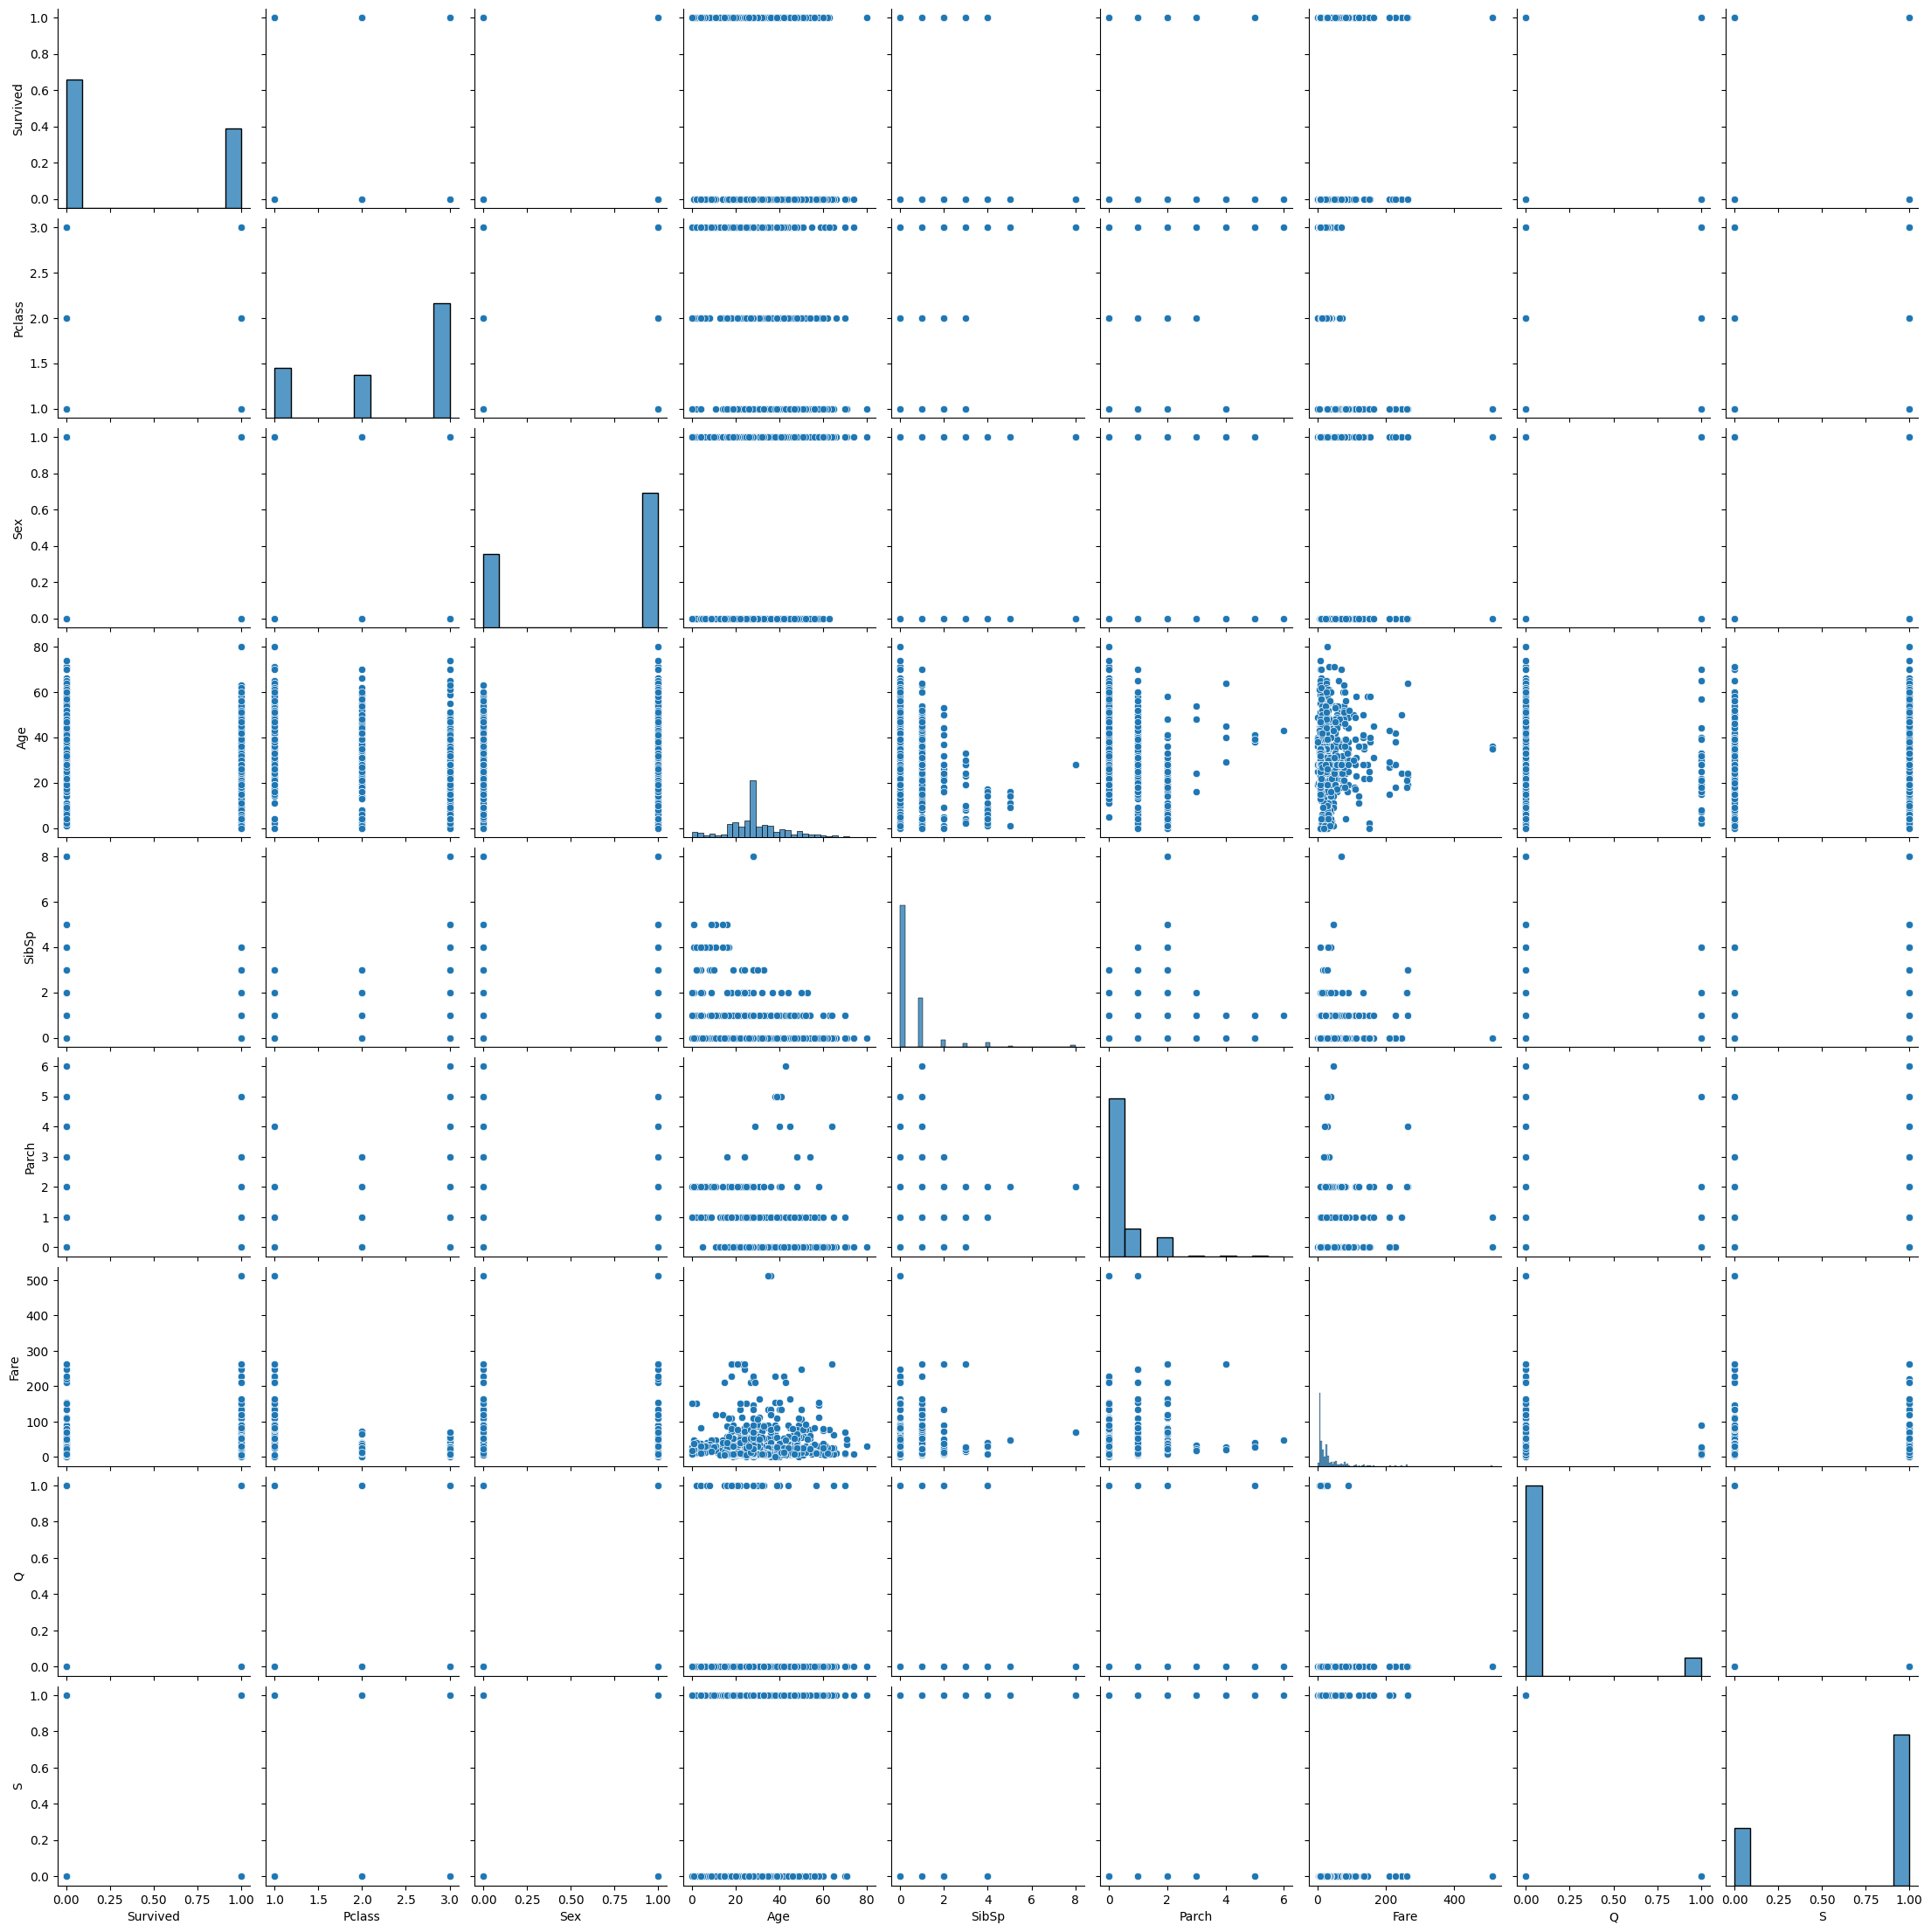

In [ ]:
sns.pairplot(df)

# Feature Importance

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
feat = ExtraTreesClassifier()

In [ ]:
feat.fit(x,y)

ExtraTreesClassifier()

In [ ]:
feat.feature_importances_

array([0.10913442, 0.28606795, 0.24360508, 0.04828667, 0.04267388,
       0.24062062, 0.00885432, 0.02075707])

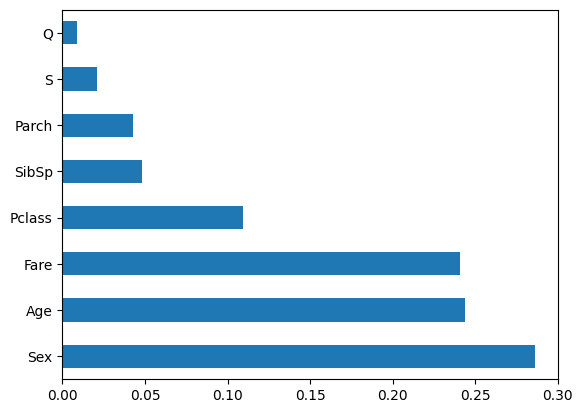

In [ ]:
feat_imp = pd.Series(feat.feature_importances_,index=x.columns)
feat_imp.nlargest(8).plot(kind="barh")
plt.show()

# Splitting of the Data

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
for train_index, test_index in skf.split(x,y):
  x_train,x_test = x.iloc[train_index],x.iloc[test_index]
  y_train,y_test = y.iloc[train_index],y.iloc[test_index]

In [ ]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
714,2,1,52,0,0,13.00,0,1
715,3,1,19,0,0,7.65,0,1
718,3,1,28,0,0,15.50,1,0
719,3,1,33,0,0,7.78,0,1


In [ ]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
714,0
715,0
718,0
719,0


In [ ]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
706,2,0,45,0,0,13.50,0,1
707,1,1,42,0,0,26.29,0,1
708,1,0,22,0,0,151.55,0,1
709,3,1,28,1,1,15.25,0,0
710,1,0,24,0,0,49.50,0,0
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [ ]:
y_test

,Survived
706,1
707,1
708,1
709,1
710,1
...,...
886,0
887,1
888,0
889,1


# Model Selection

In [ ]:
classifier = LogisticRegression()

# Training the Model

In [ ]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Test the Model

In [ ]:
y_pred = classifier.predict(x_test)

# EDA

In [ ]:
final = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [ ]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

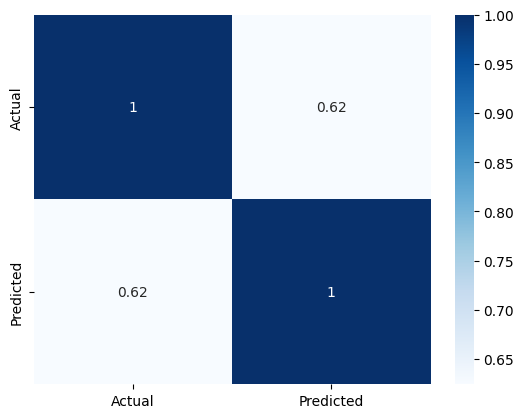

In [ ]:
sns.heatmap(final.corr(),annot=True,cmap="Blues")

# Performance Matrix - Confusion Matrix

In [ ]:
confussion_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
confussion_matrix

array([[98, 11],
       [20, 48]])

In [ ]:
# accuracy = (98+48)/Total
# accuracy = 146/177
# accuracy = 0.824

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8248587570621468

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       109\n           1       0.81      0.71      0.76        68\n\n    accuracy                           0.82       177\n   macro avg       0.82      0.80      0.81       177\nweighted avg       0.82      0.82      0.82       177\n'

# Exportation of Model and Dataset

Module - Pickle


Serialisation - Deserialisation

Dumping - Undumping

Pickling - Unpickling

In [ ]:
import pickle

In [ ]:
pick = pickle.dumps(classifier)

In [ ]:
unpickle = pickle.loads(pick)